<a href="https://colab.research.google.com/github/toushisei/1/blob/master/%E2%80%9CIMISToolA2020_Report4_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report 4 (2020/06/29verA)

for Tools for intelligent interaction systems a (0ALE005 / 0AL5706).

---

<font color="red">
If Ver.B or later, change log should be found at the end of this page.  

Your ID info should be placed in the following three items (MANDATORY).
</font>

* Student ID: 202020816
* Name: 董思斉
* Colab account: rirun1042804451@gmail.com

---

Report could be written in English or Japanese. / レポートの記述は日本語でも英語でもよい．

---

---
# Report4A: Live capture query with CIFAR-10  

* Show the way to build a classfier of CIFAR10.
* provide a python program that captures an image from a camera and that shows its recognition result of the image immediately.

Hint: Each shown in tutorials. Find a way to unite them.



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified



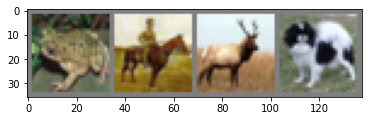

 frog horse  deer   dog
[1,  2000] loss: 2.210
[1,  4000] loss: 1.877
[1,  6000] loss: 1.683
[1,  8000] loss: 1.599
[1, 10000] loss: 1.521
[1, 12000] loss: 1.457
[2,  2000] loss: 1.406
[2,  4000] loss: 1.348
[2,  6000] loss: 1.338
[2,  8000] loss: 1.320
[2, 10000] loss: 1.296
[2, 12000] loss: 1.272
Finished Training


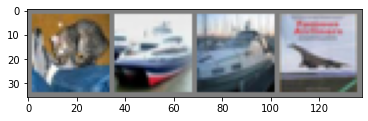

GroundTruth:    cat  ship  ship plane
Predicted:    dog   car   car plane
Accuracy of the network on the 10000 test images: 55 %
Accuracy of plane : 60 %
Accuracy of   car : 73 %
Accuracy of  bird : 32 %
Accuracy of   cat : 19 %
Accuracy of  deer : 54 %
Accuracy of   dog : 56 %
Accuracy of  frog : 45 %
Accuracy of horse : 74 %
Accuracy of  ship : 69 %
Accuracy of truck : 65 %
cpu


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms



transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



import matplotlib.pyplot as plt
import numpy as np




def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



dataiter = iter(trainloader)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))




import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



for epoch in range(2):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data


        optimizer.zero_grad()


        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        if i % 2000 == 1999:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')



dataiter = iter(testloader)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))



outputs = net(images)


_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))



correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


print(device)

In [ ]:
import cv2
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from skimage import morphology,draw
import numpy as np
import matplotlib.pyplot as plt
np.seterr(divide='ignore', invalid='ignore')
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import numpy as np
from scipy import misc
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

capture = cv2.VideoCapture(0)
video_FPS = capture.get(cv2.CAP_PROP_FPS)
print(video_FPS)

while(True):
    ret,frame = capture.read()
    print(ret)
    frame2 = cv2.resize(frame, (32, 32), interpolation=cv2.INTER_CUBIC)

    imagebatch = frame2.reshape(-1,3,32,32)
    # torch tensor
    image_tensor = torch.from_numpy(imagebatch).float()

    model.eval()
    output = model(image_tensor.to(device))
    _, predicted = torch.max(output.data, 1)
    pre = predicted.cpu().numpy()
    print(pre) 
    print(classes[pre[0]])

    c = cv2.waitKey(1)
    if c==27:
        break



cap.release()
cv2.waitKey(0)
cv2.destroyAllWindows()



---
# Report4B: Unique features of PyTorch

What are the unique features of PyTorch (compared with other ML libraries)?
Find appopriate part in the tutorials / documents in the official pytorch www, site them, and point the features. Then summersize them totally from your viewpoint. 

* List up at least two unique features. (URL, sentences to fit, and short description for each)
* Total summary would be a coule of lines.



URL：https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

特徴1、n次元のTensorである。numpyに似ていますが、GPUで実行できる

特徴2、ニューラルネットワークを構築するおよびトレーニングするための自動微分ができる。

numpyとは異なり、Pytorch TensorはGPUを使用して計算を高速化できる。現在のディープニューラルネットワークでは、GPUは50倍以上の計算速度ができる。
2層の単純なネットワークの場合、手動でのバックプロパゲーションの実装は比較的簡単であるが、大規模で複雑なネットワークの場合、バックプロパゲーションの実装は非常に複雑です。Pytorchのautogradパッケージは自動微分ができ，ニューラルネットワークのバックプロパゲーションを自動的に実現できる。



---
# Report4C: Tutorials of pytorch

There are [38 tutorials](https://github.com/kameda-yoshinari/IMISToolExeA2020/blob/master/300_PyTorch.ipynb) provided by the Pytorch official site. Pick up **four tutorials** (you should complete those tutorials) and make a report for the four tutorials on:

* Summary (2-3 lines)
* What you learn
* The most difficult part

Note that you can choose the first two (mandatory ones) in the four choices. However, if you try to reach the top-level scores, you'd better to take others (skip the first two). 

(You can put text cells around here)

1.DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ
* Summary 

> このチュートリアルはPYTORCHを使用する一つの具体的な例である。この例では、画像の分類処理を行う。

* What you learn

> PYTORCHの使い方がある程度に理解した。
また、簡単なニューラルネットワークで画像分類処理の流れもある程度に理解した。
1. torchvisionを使用して、CIFAR10のトレーニングおよびテストデータセットを読み込み、正規化します。
2.たたみ込みニューラルネットワークを定義する
3.損失関数を定義する
4.トレーニングサンプルデータでネットワークをトレーニングする
5.テストサンプルデータでネットワークをテストする

* The most difficult part

> プログラムの関数を理解するのは少し難しい。自分は大学でプログラムをあまりしていなかったため、今の段階でニューラルネットワークに対する処理をこなしていない。たくさんのバグを修正するのは難しい。

2. TORCHVISION OBJECT DETECTION FINETUNING TUTORIAL
* Summary 

> このチュートリアルはMASK R-CNNという方法である。主には、ディープラーニングに基づき、画像の中の人間を検出するセグメンテーション手法である。

* What you learn

> MASK R-CNNは、Faster R-CNNのに基づいて変換したシステムである。Faster R-CNN、画像内の潜在的なターゲットフレームと分類スコアを予測するために使用された。MASK R-CNNはこれに基づいて追加のブランチを追加して、各インスタンスのセグメンテーションマスクを予測する。このチュートリアルを通して、ディープラーニングに基づき、画像の中の人間を検出することができるとわかった。

* The most difficult part

> 一番難しいところはモデルの最適化と感じている。モデルを変更して、目的を達成する方法については、例えば、事前トレーニング済みのモデルと微調整を使用する。また、ResNetをMobileNetに置き換えるなど、必要に応じてモデルのバックボーンネットワークを置き換える。これらについての処理はすごく時間がかかると感じた。

3. TRANSFER LEARNING FOR COMPUTER VISION TUTORIAL
* Summary 

> このチュートリアルは転移学習についての内容を紹介した。ここでは、PyTorchで転移学習を実行する。解決すべき問題は、モデルをトレーニングし、アリとミツバチの画像を分類する

* What you learn

> 実際の状況では、ゼロからモデルを訓練するのは難しい。ネットワークは非常に深く、十分な大きさのデータセットが必要のため、十分に大きなデータセットを取得することが難しい。そのため、普通には、大きなデータセットを事前トレーニングして、ConvNetを取得する。ConvNetパラメーターを新しいシステムの初期化パラメーターとして使用する。或は、これらのパラメーターを修正する。

* The most difficult part

> 既存のトレーニング済みモデルから現在のシステムに適したモデルを選択するのは難しいと考えられる。モデルのトレーニングに必要なデータ量はどのくらいを決めること、及びトレーニングをいつ停止するのも検討する必要な部分と考えられる。

4. ADVERSARIAL EXAMPLE GENERATION
* Summary 

> このチュートリアルは敵対的生成ネットワークについての内容を紹介した。ここでは、PyTorchで一つのモデルの干渉防止能力の強さをテストする。

* What you learn

> モデルを設計およびトレーニングするとき、特にモデルを欺こうとする反対者に対して、画像に微妙な干渉を追加すると、モデルの識別結果は大きな違いが生じる可能性がある。GANsは生成ネットワークと識別ネットワーク）の2つのネットワークから構成される。例えば、画像生成を目的とするなら生成側がイメージを出力し、識別側がその正否を判定する。生成側は識別側を欺こうと学習し、識別側はより正確に識別しようと学習する。

* The most difficult part

> GANsの機能は、ノイズによって生成されたデータを偽として識別し、実際のデータを真として識別することである。生成されたネットワークの損失関数は、ノイズがある画像に対して、識別ネットワークが真に識別する。そして、結果を作成する。難しいところは、ノイズの識別と考えられる。






---
# Report4D: Data Augmentation  

Answer the questions below.

* What is "data augmentation"? 
* How it is applied in a tutorial in this course actually?
* Why do you think it is needed in Machine Learning?


* What is "data augmentation"?

> data augmentationはデータ拡張である。データ拡張は画像に変換処理を加えることで、学習データの「水増し」を行う。

* How it is applied in a tutorial in this course actually?

> 実際の処理では、画像に変換処理を行う。例えば、反転、拡大、縮小、移動、RGB変換など。

* Why do you think it is needed in Machine Learning?

> 機械学習モードをトレーニングするとき、実際に行うことは、入力（画像など）を出力（タグなど）にマップできるようにパラメーターを調整することである。目標は、より低い損失でモデルの最良の点を追求することである。学習データが少ないと過学習が起きてしまい汎化性能(未知のデータに対する性能)がでないと言われている。学習データを水増しされることで同じ画像が学習されることが少なくなるので汎化性能が改善される。




---
# Report submission

The report template will be given in ipynb file.
You should save it to your local google colaboratory folder and then edit it to fit your report.

The report submission should be made at this cource (0ALE005) at https://manaba.tsukuba.ac.jp .
Note that 0ALE005 is coupled with 0ALE002 and 0AL5706 on manaba system.


**File (main)**

Download the ipynb to your local machine and then submit the file to the manaba.

**URL (backup)**

Make a shared link which is open only to the alumni.tsukuba.ac.jp (筑波大学交流広場) domain.

![共有可能なリンク](https://docs.google.com/drawings/d/e/2PACX-1vTDuOu8Z1nZFTqJ0yMKXedJwDnZx0hiKXoL56h21kQrDRj4C52aQX7Nn9QJZFZAgKV32lxTzuvNlory/pub?w=508&h=403)





---
Tools for intelligent interaction systems a  
Master's and Docotal programs in intelligent and mechanical interaction systems, University of Tsukuba, Japan.  
KAMEDA Yoshinari, SHIBUYA Takeshi  
2020/06.29.

知能システムツール演習a  
知能機能システム学位プログラム (筑波大学大学院)  
担当：亀田能成，澁谷長史  
2020/06/29.

